In [1]:
#Importing libraries for dataframes,scientific computation and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np
import warnings

In [2]:
warnings.filterwarnings('ignore') #Filtering outputs for cleaned results

In [3]:
df = pd.read_csv("house_prices[1].csv") #reading the data into 'df' dataframes

## EXPLORATORY DATA ANALYSIS AND FEATURE ENGINEERING 

In [5]:
df.shape #Checking for the number of rows and columns in my dataframe

(187531, 21)

In [6]:
df.sample(2) #Checking for 2 random sample rows of my dataframe

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
43350,43350,2 BHK Ready to Occupy Flat for sale Sembakkam,This beautiful 2 BHK Flat is available for sal...,54.5 Lac,5800.0,chennai,800 sqft,Ready to Move,2 out of 3,New Property,...,North,Main Road,NaN,2,1,1 Covered,Freehold,NaN,NaN,NaN
11814,11814,5 BHK Ready to Occupy Flat for sale in Adani S...,This gorgeous 5 BHK Flat is available for sale...,3.65 Cr,NaN,ahmedabad,4734 sqft,Ready to Move,16 out of 16,Resale,...,East,NaN,Adani Shantigram Waterlily,5,1,"2 Covered,",Freehold,NaN,NaN,NaN


In [7]:
df.info() #checking for my dataframes information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

#### Cleaning and converting the Amount column to a numerical data

In [9]:
df["Amount(in rupees)"].unique() #Checking for unique values in the  amount column

array(['42 Lac ', '98 Lac ', '1.40 Cr ', ..., '1.5 Lac ', '24.4 Lac ',
       '9.90 Cr '], dtype=object)

In [10]:
#The amount has two different units, Lac and Cr

In [11]:
df["Amount(in rupees)"] = df["Amount(in rupees)"].str.replace("Cr","*100",regex=False) 
#Replacing and converting Cr to Lac
# 100 lac = 1Cr

In [12]:
df["Amount(in rupees)"].unique()
#After replacing 100 lac = 1Cr

array(['42 Lac ', '98 Lac ', '1.40 *100 ', ..., '1.5 Lac ', '24.4 Lac ',
       '9.90 *100 '], dtype=object)

In [13]:
df["Amount(in rupees)"] = df["Amount(in rupees)"].str.replace("Lac","",regex=False)
# Removing Lac from the values

In [14]:
df["Amount(in rupees)"].unique()
#Current unique values in string 

array(['42  ', '98  ', '1.40 *100 ', ..., '1.5  ', '24.4  ', '9.90 *100 '],
      dtype=object)

In [15]:
#Assign the current column of "Amount(in rupees)" to amount 
amount = df["Amount(in rupees)"] 

In [16]:
#Create empty list to store the evaluated string values to float by using a for loop
values = [] 
for i in amount:  
    try:
        values.append(eval(i)) #eval(), function for mathematical calculation for converting string expressions to a folating values
    except:
        values.append(None) #For exception handling , by appending None if i doesn't exist in amount

In [17]:
df["Amount(Lac)"] = values #Assigning the final convertion 'values' to the Amount(Lac) column

In [18]:
df["Amount(Lac)"].unique() #Final amount values in float

array([ 42. ,  98. , 140. , ...,   1.5,  24.4, 990. ])

In [19]:
#Drop the df["Amount(in rupees)"] column
df.drop(["Amount(in rupees)"],axis=1,inplace=True)

In [20]:
#Cleaning the price column by converting it from rupees to Lac

In [21]:
df["Price (in rupees)"].unique()

array([ 6000., 13799., 17500., ...,  2873.,  2663.,  2508.])

In [22]:
#Converting the price from rupees to Lac
df["Price (Lac)"] = df["Price (in rupees)"]/100_000  #1lac == 100,000rupees

In [23]:
df["Price (Lac)"].unique()

array([0.06   , 0.13799, 0.175  , ..., 0.02873, 0.02663, 0.02508])

In [24]:
#Drop the "Price (in rupees)" column
df.drop(["Price (in rupees)"],axis=1,inplace=True)

#### Cleaning the Carpet area

In [26]:
df["Carpet Area"].unique()

array(['500 sqft', '473 sqft', '779 sqft', ..., '1634 sqft', '164 sqyrd',
       '136 sqft'], dtype=object)

In [27]:
df[df["Carpet Area"] == '164 sqyrd'] #Getting the index of the '164 sqyrd' for verification

,Index,Title,Description,location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,...,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area,Amount(Lac),Price (Lac)
187488,187488,4 BHK Ready to Occupy Flat for sale in Motia A...,Creatively planned and constructed is a 4 BHK ...,zirakpur,164 sqyrd,Ready to Move,2 out of 3,New Property,Semi-Furnished,East,...,Motia Aero Greens,3,2,1 Covered,Freehold,NaN,NaN,NaN,72.0,0.04878


##### Converting the square yard into square feet to have consistent units

In [29]:
df["Carpet Area"] = df["Carpet Area"].str.replace("sqyrd","*9",regex=False) 
#Converting square yard to square feet

In [30]:
df["Carpet Area"] = df["Carpet Area"].str.replace("sqft","",regex=False).ffill()

In [31]:
df["Carpet Area"].isnull().sum() #Checking for null values

0

In [32]:
carpet = [] #Empty list for storing the converted values 

In [33]:
for u in df["Carpet Area"]:
    try:
        carpet.append(eval(u))
    except:
        carpet.append(None)

In [34]:
df["Carpet_Area_sqft"] = carpet #assigning it to a new column

In [35]:
#Drop the old column
df.drop(["Carpet Area"],axis=1,inplace=True)

In [36]:
df["Carpet_Area_sqft"][[187488]] #Confirming for 164sqyrd to sqft. 1sqyrd == 9sqft

187488    1476.0
Name: Carpet_Area_sqft, dtype: float64

In [37]:
#Done with the Carpet

#### Cleaning the Bathroom column

In [39]:
df["Bathroom"].unique() #Checking for unique values in the Bathroom column

array(['1', '2', '3', '4', '6', nan, '5', '10', '9', '8', '> 10', '7'],
      dtype=object)

In [40]:
df["Bathroom"].isnull().sum()*100/df.shape[0] #Checking for the percentage of Null values in Bathroom column

0.4415270008691896

In [41]:
df.groupby("Bathroom")["Price (Lac)"].value_counts()[:10]

Bathroom  Price (Lac)
1         0.06000        858
          0.10000        847
          0.04889        834
          0.04074        826
          0.18000        824
          0.03676        650
          0.14000        650
          0.02976        649
          0.03793        648
          0.04792        647
Name: count, dtype: int64

In [42]:
df["Bathroom"] = df["Bathroom"].fillna(method='ffill') #Using forward fill method for handling Null values

In [43]:
df["Bathroom"].unique()

array(['1', '2', '3', '4', '6', '5', '10', '9', '8', '> 10', '7'],
      dtype=object)

In [44]:
df["Bathroom"] = df["Bathroom"].str.extract('(\d+)').astype(int) #Extracting the numerical values and converting to discrete values

In [45]:
df["Bathroom"].unique()

array([ 1,  2,  3,  4,  6,  5, 10,  9,  8,  7])

In [46]:
#Done with the Bathroom cleaning

#### Cleaning the Balcony column

In [48]:
df["Balcony"].unique()

array(['2', nan, '1', '3', '4', '> 10', '6', '5', '7', '10', '8', '9'],
      dtype=object)

In [49]:
df["Balcony"] = df["Balcony"].ffill() #Filling the null values with mode value

In [50]:
df["Balcony"].unique()

array(['2', '1', '3', '4', '> 10', '6', '5', '7', '10', '8', '9'],
      dtype=object)

In [51]:
df["Balcony"] = df["Balcony"].str.extract('(\d+)').astype(int) #Extracting the numerical values and converting it to num

In [52]:
df["Balcony"].unique()

array([ 2,  1,  3,  4, 10,  6,  5,  7,  8,  9])

In [53]:
# Done cleaning df["Balcony"]

#### Cleaning the Super Area column

In [55]:
df["Super Area"].unique()

array([nan, '680 sqft', '575 sqft', ..., '2066 sqft', '406 sqft',
       '2332 sqft'], dtype=object)

In [56]:
df["Super Area"] = df["Super Area"].bfill() #Backward fill for NaN data 

In [57]:
df["Super Area"] = df["Super Area"].str.replace("sqyrd","*9",regex=False) #Converting the data from square yard to square feet 1sqyrd = 9sqft

In [58]:
df["Super Area"] = df["Super Area"].str.replace("sqft","",regex=False)

In [59]:
super = []

In [60]:
for area in df["Super Area"]:
    try:
        super.append(int(eval(area)))
    except:
        super.append(None)

In [61]:
df["Super_Area_sqft"] = super

In [62]:
df.drop("Super Area",axis=1,inplace=True)

In [63]:
df["Super_Area_sqft"][131800] #For 9 * 140sqyrd == 1260

1260.0

In [64]:
df["Super_Area_sqft"].unique()

array([ 680.,  575.,  600., ..., 2066.,  406., 2332.])

In [65]:

#Done cleaning the "Super Area" column

In [66]:
df.columns #Columns in the dataframe

Index(['Index', 'Title', 'Description', 'location', 'Status', 'Floor',
       'Transaction', 'Furnishing', 'facing', 'overlooking', 'Society',
       'Bathroom', 'Balcony', 'Car Parking', 'Ownership', 'Dimensions',
       'Plot Area', 'Amount(Lac)', 'Price (Lac)', 'Carpet_Area_sqft',
       'Super_Area_sqft'],
      dtype='object')

In [67]:
df.nunique() #Number of unique values in the columns of  the dataframe

Index               187531
Title                32446
Description          65634
location                81
Status                   1
Floor                  947
Transaction              4
Furnishing               3
facing                   8
overlooking             19
Society              10376
Bathroom                10
Balcony                 10
Car Parking            229
Ownership                4
Dimensions               0
Plot Area                0
Amount(Lac)           1559
Price (Lac)          10958
Carpet_Area_sqft      2425
Super_Area_sqft       2619
dtype: int64

In [68]:
df.nunique()*100/df.shape[0] #Percentage of the unique values in the dataframe

Index               100.000000
Title                17.301673
Description          34.999013
location              0.043193
Status                0.000533
Floor                 0.504983
Transaction           0.002133
Furnishing            0.001600
facing                0.004266
overlooking           0.010132
Society               5.532952
Bathroom              0.005332
Balcony               0.005332
Car Parking           0.122113
Ownership             0.002133
Dimensions            0.000000
Plot Area             0.000000
Amount(Lac)           0.831329
Price (Lac)           5.843301
Carpet_Area_sqft      1.293120
Super_Area_sqft       1.396569
dtype: float64

In [69]:
df.isnull().sum()*100/df.shape[0] #Percantage of the Null valueas in the dataframe

Index                 0.000000
Title                 0.000000
Description           1.612000
location              0.000000
Status                0.327946
Floor                 3.773776
Transaction           0.044259
Furnishing            1.544811
facing               37.451408
overlooking          43.425354
Society              58.485264
Bathroom              0.000000
Balcony               0.000000
Car Parking          55.114621
Ownership            34.936624
Dimensions          100.000000
Plot Area           100.000000
Amount(Lac)           5.163946
Price (Lac)           9.419776
Carpet_Area_sqft      0.792936
Super_Area_sqft       1.062758
dtype: float64

#### Dropping unecessary columns

In [71]:
df.drop(["Plot Area","Dimensions","Car Parking","Society"],axis=1,inplace=True)

In [72]:
df.duplicated().sum()

0

In [73]:
df.drop("Index",axis=1,inplace=True) 

#### THE NUMERICAL DATA

In [75]:
numerical_col = df.select_dtypes(exclude='object')[:5]

#### CATEGORICAL DATA

In [77]:
categorical_col = df.select_dtypes(include='object')

### OUTLIERS REMOVAL USING ZSCORE,IQR AND BOXPLOT

#### Describe data

In [80]:
categorical_col.describe() #Statistical summmary of both the categorical and text columns

,Title,Description,location,Status,Floor,Transaction,Furnishing,facing,overlooking,Ownership
count,187531,184508,187531,186916,180454,187448,184634,117298,106095,122014
unique,32446,65634,81,1,947,4,3,8,19,4
top,2 BHK Ready to Occupy Flat for sale in Divyasr...,Multistorey apartment is available for sale. I...,new-delhi,Ready to Move,2 out of 4,Resale,Semi-Furnished,East,Main Road,Freehold
freq,2106,2732,27599,186916,12433,144172,88318,54741,32193,112229


In [81]:
numerical_col.describe() # Statistical summmary of the numerical data columns

,Bathroom,Balcony,Amount(Lac),Price (Lac),Carpet_Area_sqft,Super_Area_sqft
count,5.000000,5.000000,5.000000,4.000000,5.000000,5.0
mean,1.600000,1.600000,93.000000,0.140308,583.400000,680.0
std,0.547723,0.547723,59.050826,0.057607,125.416506,0.0
min,1.000000,1.000000,25.000000,0.060000,473.000000,680.0
25%,1.000000,1.000000,42.000000,0.118493,500.000000,680.0
50%,2.000000,2.000000,98.000000,0.156495,530.000000,680.0
75%,2.000000,2.000000,140.000000,0.178310,635.000000,680.0
max,2.000000,2.000000,160.000000,0.188240,779.000000,680.0


#### CHECKING THE FREQUENCIES OF AMOUNT OF DIFFERENT FURNISHING FEATURES

In [83]:
df.Furnishing.unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished', nan], dtype=object)

In [84]:
furnish_amount = pd.melt(df, id_vars="Furnishing",value_vars="Amount(Lac)") #For getting the "Furnishing" and "Amount(Lac)" columns

In [85]:
furnish_amount[:4] #First four rows

,Furnishing,variable,value
0,Unfurnished,Amount(Lac),42.0
1,Semi-Furnished,Amount(Lac),98.0
2,Unfurnished,Amount(Lac),140.0
3,Unfurnished,Amount(Lac),25.0


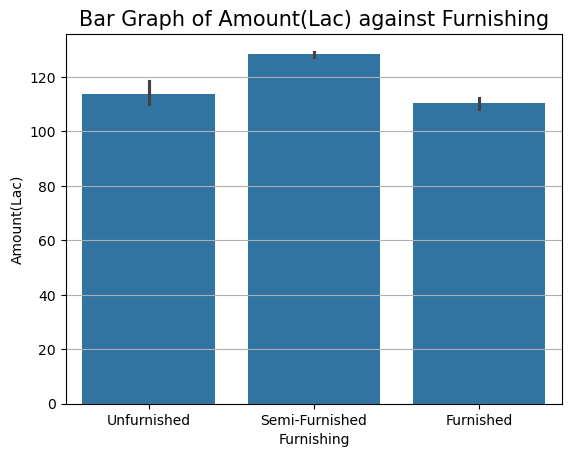

In [86]:
# "Bar Graph of Amount(Lac) against Furnishing"
plt.grid()
sns.barplot(x=furnish_amount["Furnishing"],y=furnish_amount["value"])
plt.title("Bar Graph of Amount(Lac) against Furnishing",fontsize=15)
plt.xlabel("Furnishing",fontsize=10)
plt.ylabel("Amount(Lac)",fontsize=10)
plt.show()

In [87]:
#BOXPLOT OF NUMERICAL COLUMNS

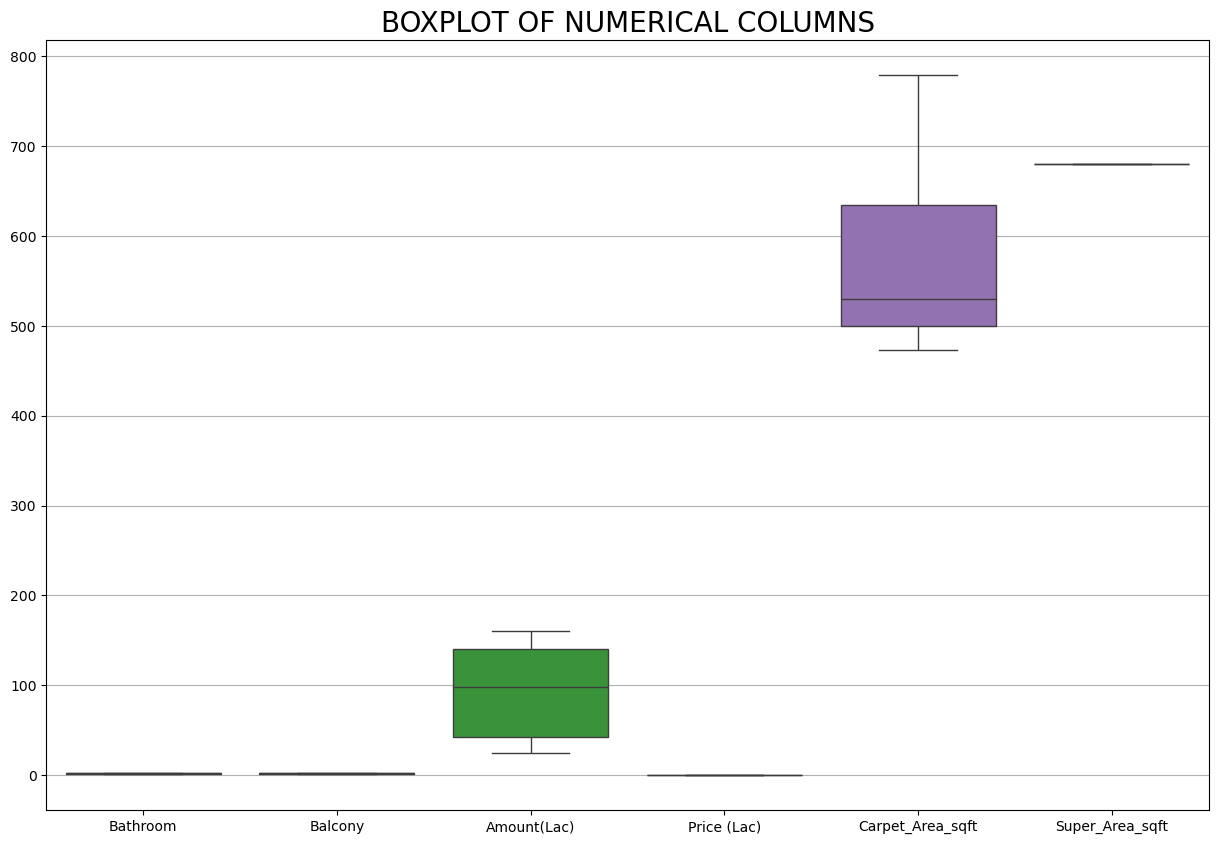

In [88]:
plt.figure(figsize=(15,10))
plt.grid()
sns.boxplot(numerical_col) 
plt.title("BOXPLOT OF NUMERICAL COLUMNS",fontsize=20)
plt.show()

#### THE NUMBER OF BALCONY SHOULD NOT BE MORE THAN TWICE THE NUMBER OF BATHROOMS

In [90]:
df.query("Balcony > Bathroom*2").shape

(1442, 16)

In [91]:
#Drop the columns with Balcony > 2*Bathroom
mask_balcony = df["Balcony"] < df["Bathroom"]*2
df = df[mask_balcony]

In [92]:
df.shape[0]-df.query("Balcony > Bathroom*2").shape[0] #Remaining rows

178086

### Using zcsore for outliers removal

In [94]:
df["Z_score"] = zscore(df["Bathroom"]) #zscore for number of bathrooms

In [95]:
df["Z_score"].head() #zscore values 

1   -0.571879
2   -0.571879
3   -1.752920
4   -0.571879
5   -1.752920
Name: Z_score, dtype: float64

In [96]:
df["Z_score"].min(),df["Z_score"].max()

(-1.7529200054232745, 8.876452980042275)

##### Using a deviation of 3 and -3 intervals of std

In [98]:
df = df[(df.Z_score > -3) & (df.Z_score <= 3)]

In [99]:
df.shape

(177766, 17)

In [100]:
#Dropping the z_score column
df.drop("Z_score",axis=1,inplace=True)

In [101]:
df.sample() #Random sample of the data

,Title,Description,location,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership,Amount(Lac),Price (Lac),Carpet_Area_sqft,Super_Area_sqft
145389,2 BHK Ready to Occupy Flat for sale in Aranya ...,This magnificent 2 BHK Flat is available for s...,pune,Ready to Move,3 out of 6,New Property,Semi-Furnished,East,"Garden/Park, Main Road",2,2,Co-operative Society,84.0,0.07778,820.0,1100.0


### Using IQR for outlier removal, for Price and Amount

In [103]:
Q1p,Q3p = df["Price (Lac)"].quantile([0.25,0.75]) #25% and 75% percentiles of the Price column

In [104]:
IQR = (Q3p - Q1p)

In [105]:
price_lower_limit = Q1p - IQR*1.5 #Lower limit of the price
price_upper_limit = Q3p + IQR*1.5 #Upper limit of the price

In [106]:
round(price_lower_limit,3),round(price_upper_limit,3)

(-0.029, 0.164)

In [107]:
mask_price = ((df["Price (Lac)"] > price_lower_limit) & (df["Price (Lac)"] < price_upper_limit))

In [108]:
df = df[mask_price]

#### Using a boxplot to clean the Carpet_Area_sqft and	Super_Area_sqft columns

##### Cleaning the Carpet_Area_sqft column

In [111]:
df["Carpet_Area_sqft"].min(),df["Carpet_Area_sqft"].mean(),df["Carpet_Area_sqft"].max()

(1.0, 1219.906500585935, 709222.0)

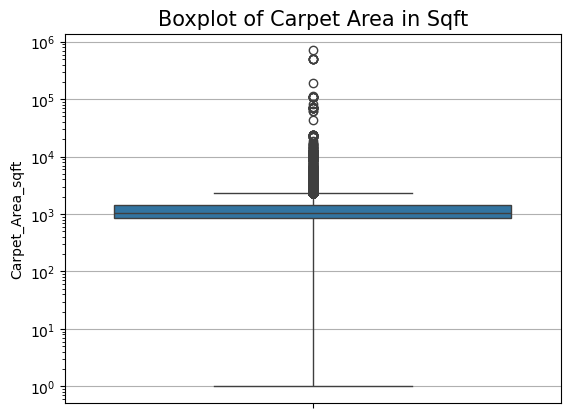

In [112]:
#Before outiers removal
plt.grid(visible=True)
plt.title("Boxplot of Carpet Area in Sqft",fontsize=15)
sns.boxplot(df["Carpet_Area_sqft"])
plt.yscale("log")

In [113]:
mask_carpet = (df["Carpet_Area_sqft"] < 2200) & (df["Carpet_Area_sqft"] > 100) 

In [114]:
df = df[mask_carpet]

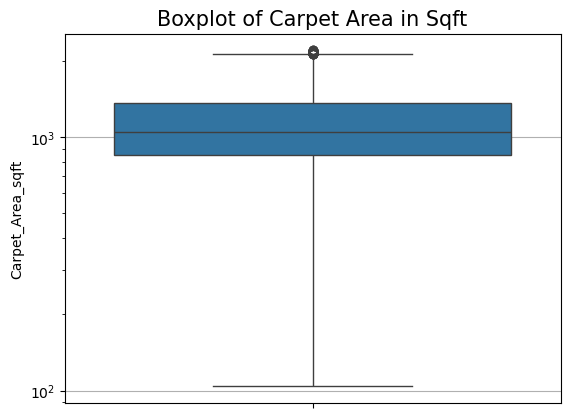

In [115]:
#After outiers removal
plt.grid(visible=True)
plt.title("Boxplot of Carpet Area in Sqft",fontsize=15)
sns.boxplot(df["Carpet_Area_sqft"])
plt.yscale("log")

##### Cleaning the Super_Area_sqft column

In [117]:
df["Super_Area_sqft"].min(),df["Super_Area_sqft"].mean(),df["Super_Area_sqft"].max()

(1.0, 1397.6167287370727, 10890.0)

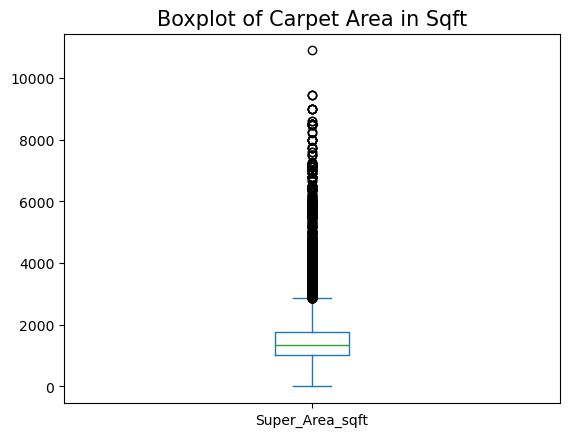

In [118]:
#Before outliers removal
plt.title("Boxplot of Carpet Area in Sqft",fontsize=15)
df.Super_Area_sqft.plot(kind='box')
plt.show()

In [119]:
mask_super_area = (df.Super_Area_sqft > 100) & (df.Super_Area_sqft < 2200)

In [120]:
df = df[mask_super_area]

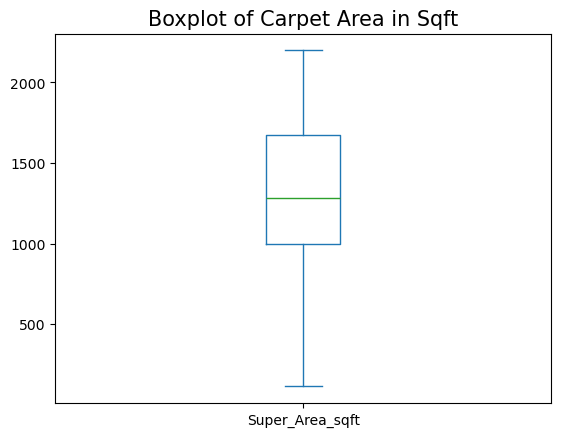

In [121]:
#after outliers removal
plt.title("Boxplot of Carpet Area in Sqft",fontsize=15)
df.Super_Area_sqft.plot(kind='box')
plt.show()

## VISUALISATION ANALYSIS OF THE DATA

In [123]:
df.columns

Index(['Title', 'Description', 'location', 'Status', 'Floor', 'Transaction',
       'Furnishing', 'facing', 'overlooking', 'Bathroom', 'Balcony',
       'Ownership', 'Amount(Lac)', 'Price (Lac)', 'Carpet_Area_sqft',
       'Super_Area_sqft'],
      dtype='object')

#### USING HISTOGRAM TO CHECK FOR FREQUENCIES

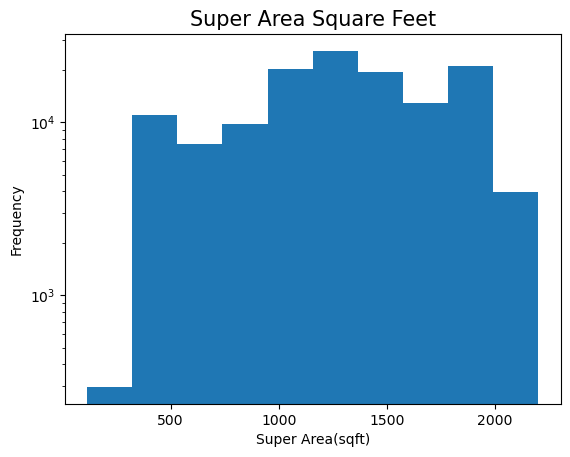

In [125]:
#Histogram of Super_Area_sqft
plt.hist(df.Super_Area_sqft)
plt.title("Super Area Square Feet",fontsize=15)
plt.xlabel("Super Area(sqft)",fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.yscale("log")
plt.show()

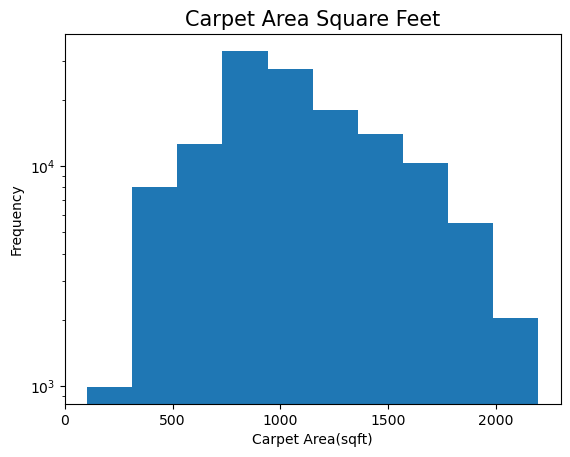

In [126]:
#Histogram of Super_Area_sqft
plt.hist(df.Carpet_Area_sqft)
plt.title("Carpet Area Square Feet",fontsize=15)
plt.xlabel("Carpet Area(sqft)",fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.yscale("log")
plt.show()

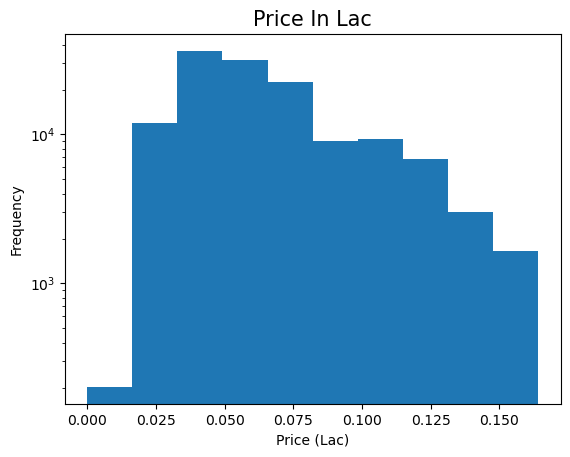

In [127]:
#Histogram of Price (Lac)
plt.hist(df["Price (Lac)"])
plt.title("Price In Lac",fontsize=15)
plt.xlabel("Price (Lac)",fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.yscale("log")
plt.show()

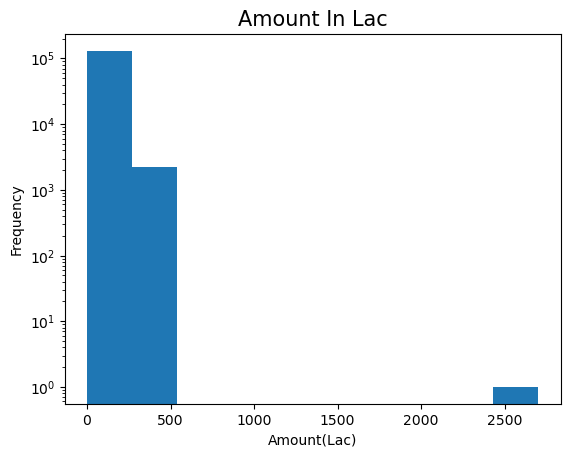

In [128]:
#Histogram of Amount(Lac)
plt.hist(df["Amount(Lac)"])
plt.title("Amount In Lac",fontsize=15)
plt.xlabel("Amount(Lac)",fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.yscale("log")
plt.show()

In [129]:
#From the above plot it shows that the value at 2500 is an outlier

In [130]:
#Drop
mask_2500 = df["Amount(Lac)"] < 1400

In [131]:
df = df[mask_2500]

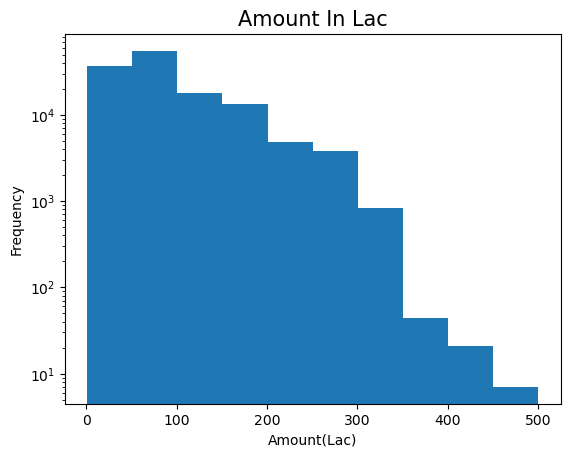

In [132]:
plt.hist(df["Amount(Lac)"])
plt.title("Amount In Lac",fontsize=15)
plt.xlabel("Amount(Lac)",fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.yscale("log")
plt.show()

#### Using scatter plot to check for relationship between columns

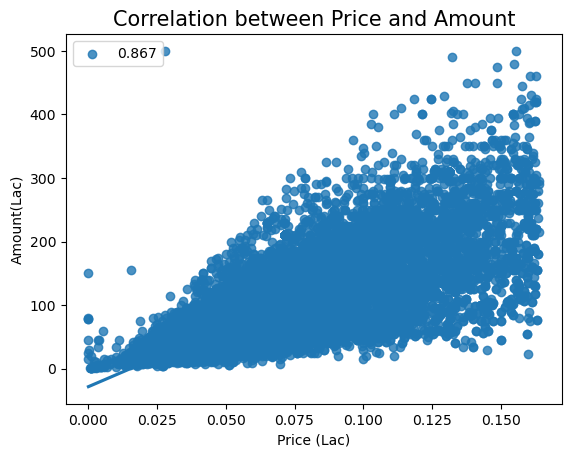

In [134]:
#Correlation between Price (Lac) and Amount(Lac)
corr = round(df["Price (Lac)"].corr(df["Amount(Lac)"]),3)
sns.regplot(x=df["Price (Lac)"],y=df["Amount(Lac)"],label=corr)
plt.title("Correlation between Price and Amount",fontsize=15)
plt.xlabel("Price (Lac)",fontsize=10)
plt.ylabel("Amount(Lac)",fontsize=10)
plt.legend()
plt.show()

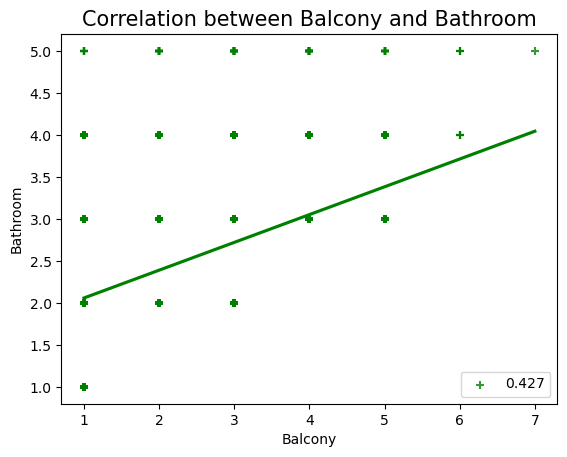

In [135]:
#Correlation between Balcony and Bathroom
corr2 = round(df["Balcony"].corr(df["Bathroom"]),3)
sns.regplot(x=df["Balcony"],y=df["Bathroom"],label=corr2,marker='+',color='g')
plt.title("Correlation between Balcony and Bathroom",fontsize=15)
plt.xlabel("Balcony",fontsize=10)
plt.ylabel("Bathroom",fontsize=10)
plt.legend()
plt.show()

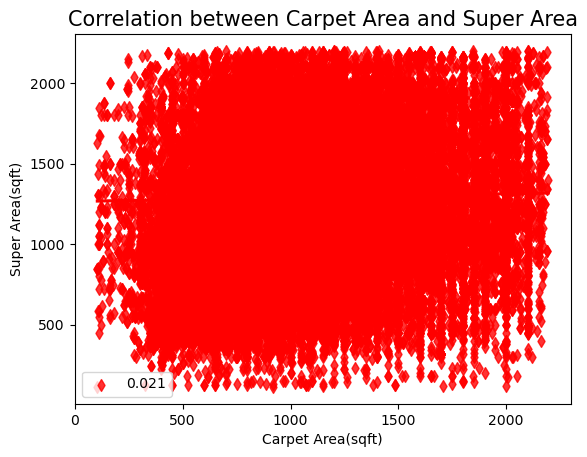

In [136]:
#Correlation between Carpet_Area_sqft and Bathroom
corr2 = round(df["Carpet_Area_sqft"].corr(df["Super_Area_sqft"]),3)
sns.regplot(x=df["Carpet_Area_sqft"],y=df["Super_Area_sqft"],label=corr2,marker='d',color='r')
plt.title("Correlation between Carpet Area and Super Area",fontsize=15)
plt.xlabel("Carpet Area(sqft)",fontsize=10)
plt.ylabel("Super Area(sqft)",fontsize=10)
plt.legend()
plt.show()

#### USING HEATMAP TO CHECK THE CORRELATION OF THE NUMERICAL COLUMNS OF THE DATA

In [138]:
numerical_cols = df.select_dtypes(exclude='object').corr()

In [139]:
#Using correlation heatmap to check the relationship of numerical columns

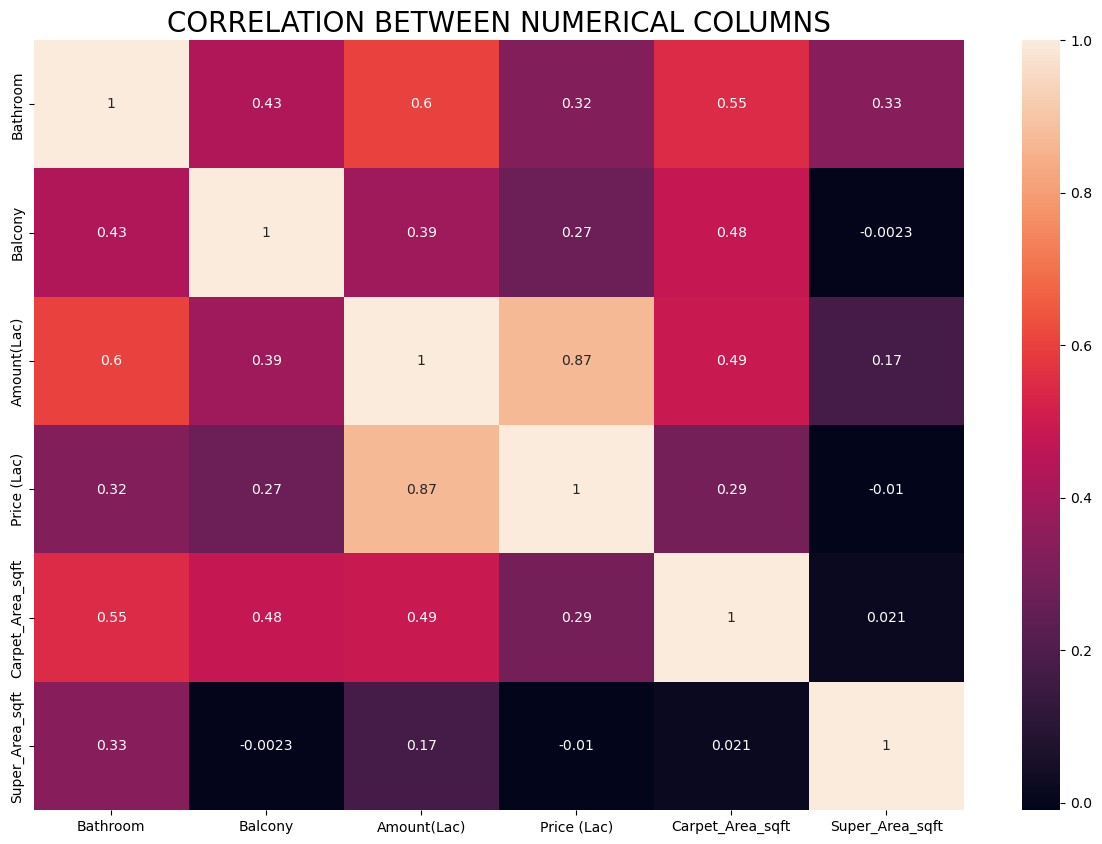

In [140]:
plt.figure(figsize=(15,10))

sns.heatmap(numerical_cols,annot=True)
plt.title("CORRELATION BETWEEN NUMERICAL COLUMNS",fontsize=20)
plt.show()

### Plot relational pair plot to check relationship

In [142]:
num_col = df.select_dtypes(exclude="object")

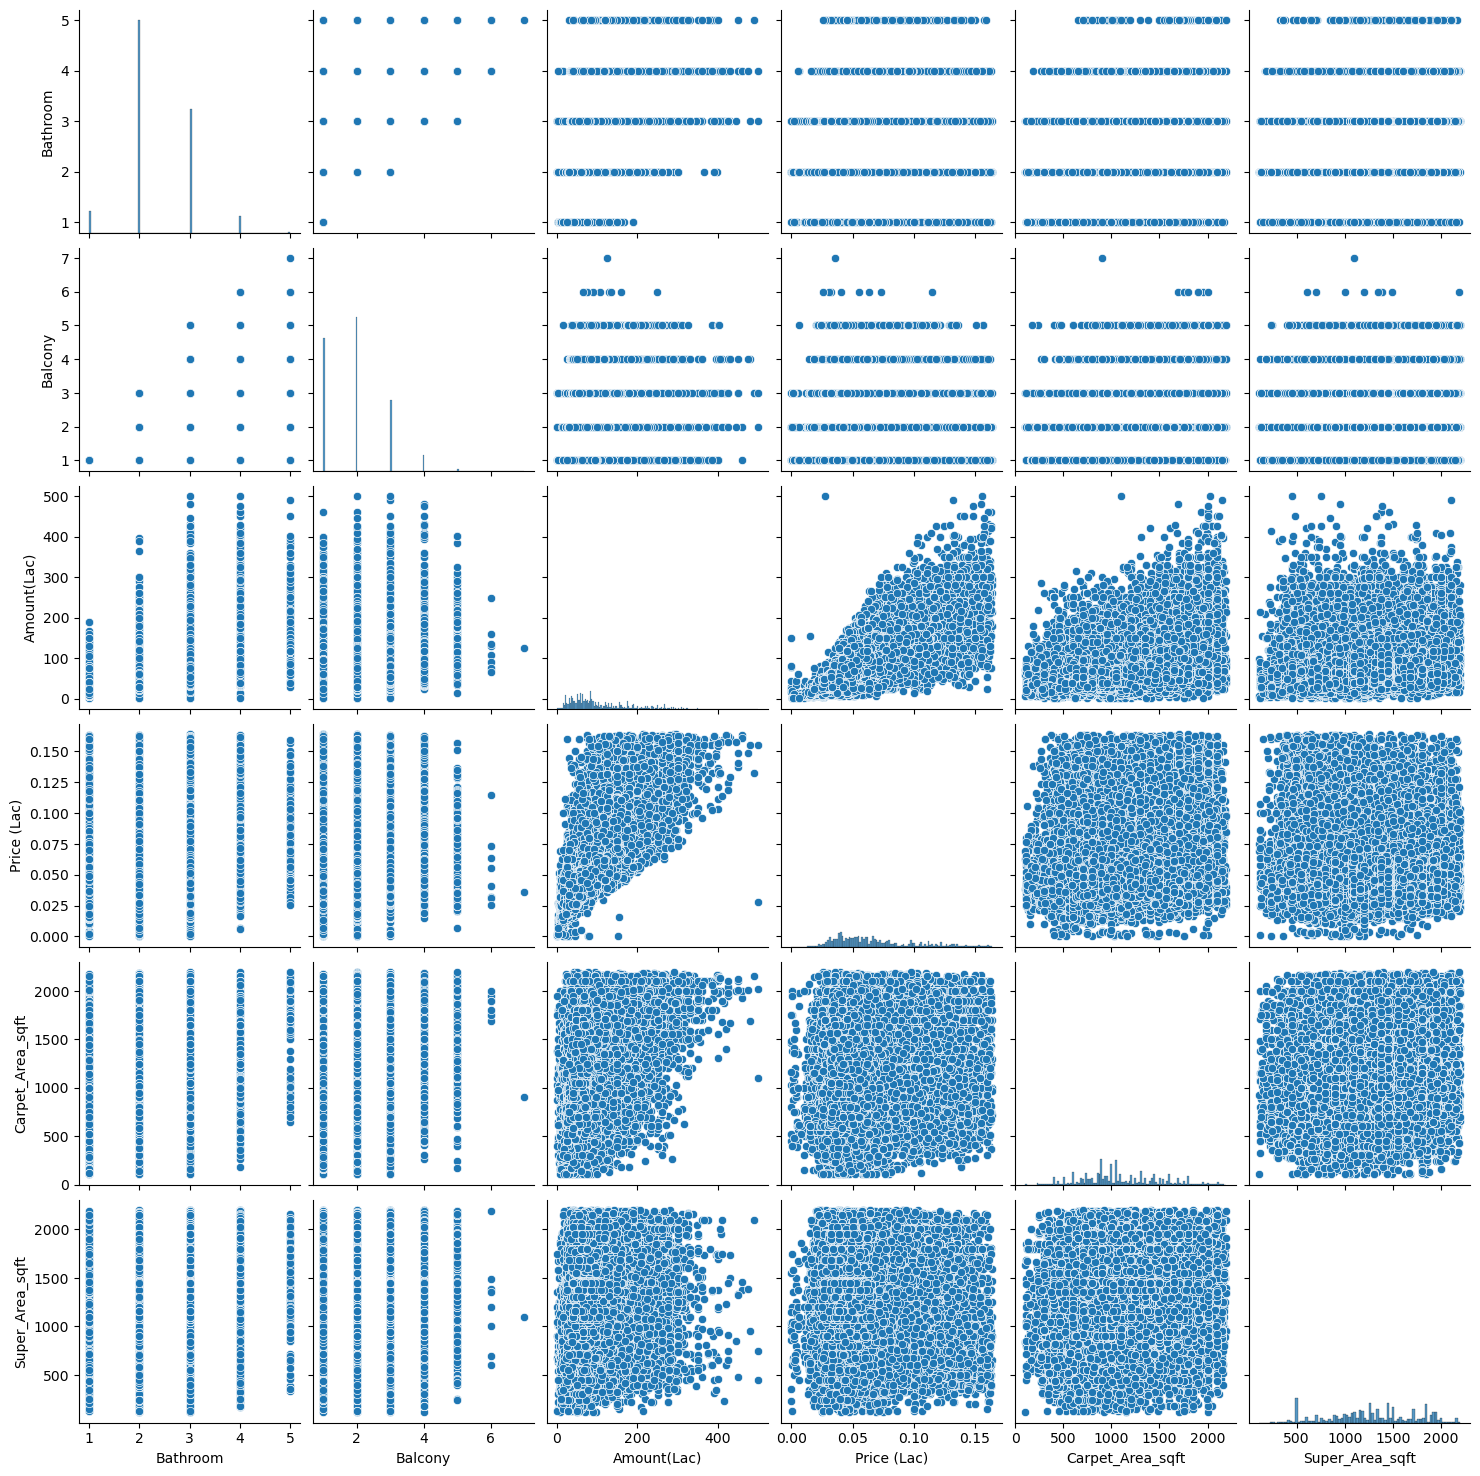

In [143]:

sns.pairplot(num_col)
plt.show()

In [144]:
num_col.columns #Choosing numerical columns with strong relationship


Index(['Bathroom', 'Balcony', 'Amount(Lac)', 'Price (Lac)', 'Carpet_Area_sqft',
       'Super_Area_sqft'],
      dtype='object')

In [145]:
specific_num_cols = df[["Amount(Lac)","Price (Lac)","Carpet_Area_sqft","Super_Area_sqft"]]

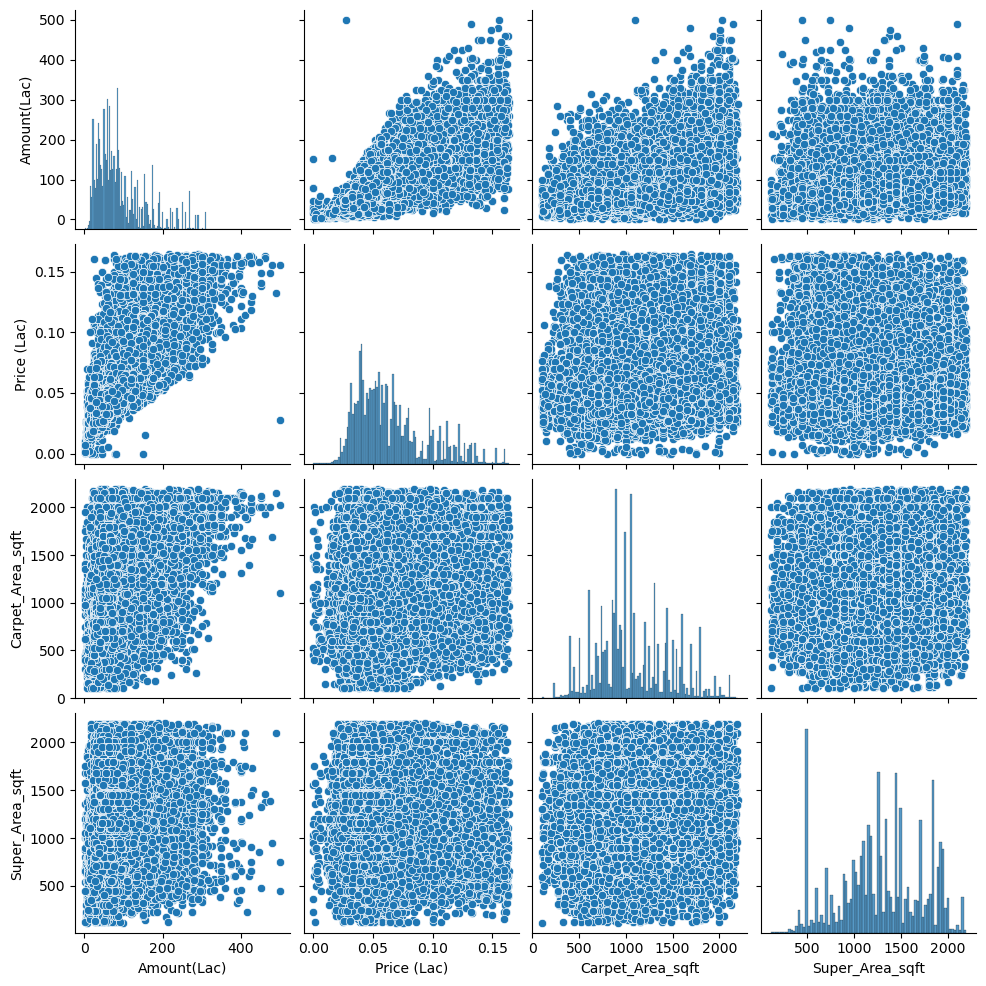

In [146]:
#HIGHLY CORRELATED NUMERICAL COLUMNS
sns.pairplot(specific_num_cols) 
plt.show()

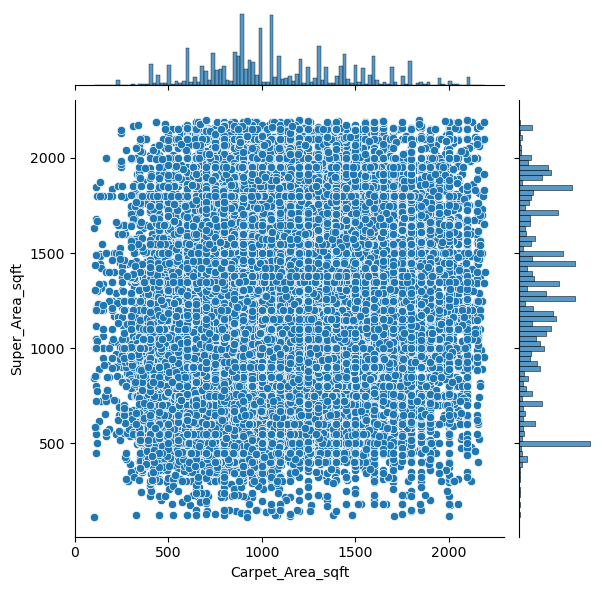

In [147]:
#Joint plot for "Carpet_Area_sqft","Super_Area_sqft"
sns.jointplot(x=df["Carpet_Area_sqft"],y=df["Super_Area_sqft"])
#plt.title("Joint Plot Between Carpet_Area_sqft and Super_Area_sqft")
plt.show()

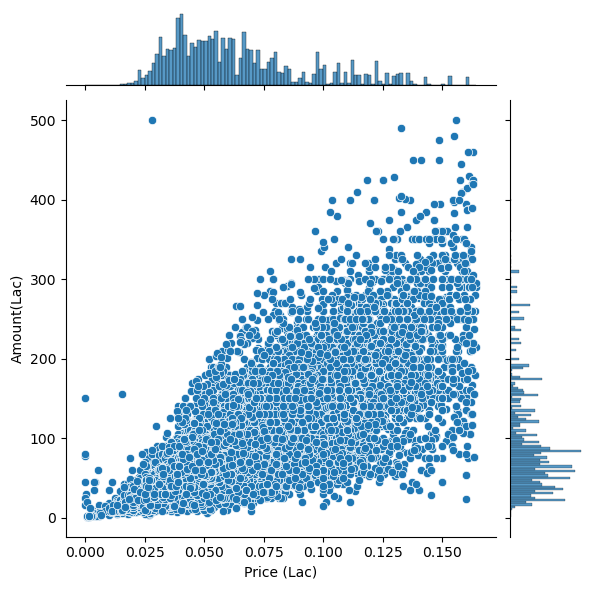

In [148]:
#Joint plot for Price (Lac) and Amount(Lac)
sns.jointplot(x=df["Price (Lac)"],y=df["Amount(Lac)"])
#plt.title("Joint Plot Between Price (Lac) and Amount(Lac)",fontsize=15)
plt.show()

### USING PREPROCESSING TECHNIQUES TO HANDLE NULL , TEXT, CATEGORICAL AND NUMERICAL VALUES

#### Saving my cleaned data

In [151]:
df.to_csv("cleaned_house_price.csv",index=False)

In [152]:
dff = pd.read_csv("cleaned_house_price.csv") #Starting to bbuild my model with my new data

In [153]:
dff.shape

(132526, 16)

In [154]:
dff = dff.head(500) #Reducing the data to 500 rows to work with
# Comment this line to get the full dataframe

In [155]:
dff.shape

(500, 16)

In [156]:
dff.isnull().sum()*100/dff.shape[0]

Title                0.0
Description          0.4
location             0.0
Status               0.6
Floor                0.6
Transaction          0.0
Furnishing           1.2
facing              35.4
overlooking         37.8
Bathroom             0.0
Balcony              0.0
Ownership           33.8
Amount(Lac)          0.0
Price (Lac)          0.0
Carpet_Area_sqft     0.0
Super_Area_sqft      0.0
dtype: float64

In [157]:
#dff =dff.ffill() #Filling Null values using forward fill method

In [158]:
#Due to storage drop all Null rows
dff.dropna(inplace=True)

In [159]:
dff.sample()

,Title,Description,location,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership,Amount(Lac),Price (Lac),Carpet_Area_sqft,Super_Area_sqft
305,2 BHK Ready to Occupy Flat for sale Kalyan West,2 BHK flat available for sale in Thane in the ...,thane,Ready to Move,2 out of 8,Resale,Unfurnished,North,"Garden/Park, Main Road",2,2,Freehold,62.0,0.062,640.0,540.0


In [160]:
import warnings
warnings.filterwarnings('ignore')

### PREPROCESSING, PIPELINE AND MODEL BUILDING

In [162]:
from sklearn.preprocessing import StandardScaler #For numerical features
from sklearn.preprocessing import OneHotEncoder #For categorical features
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer #For text features
from sklearn.impute import SimpleImputer #For Null values handling

In [163]:
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

In [164]:
#Regression models

In [165]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

In [166]:
#Model selection and Evaluation models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [167]:
from sklearn.compose import ColumnTransformer

#### DIVIDE THE DATA INTO TRAIN(70%) ,VALIDATE(15%) AND TESTING(15%)

In [169]:
dff.columns

Index(['Title', 'Description', 'location', 'Status', 'Floor', 'Transaction',
       'Furnishing', 'facing', 'overlooking', 'Bathroom', 'Balcony',
       'Ownership', 'Amount(Lac)', 'Price (Lac)', 'Carpet_Area_sqft',
       'Super_Area_sqft'],
      dtype='object')

In [170]:
#Dividing the data into train,validate and test

In [171]:
X = dff.drop(["Amount(Lac)"],axis=1)
y = dff["Amount(Lac)"]

In [172]:
X[:3]

,Title,Description,location,Status,Floor,Transaction,Furnishing,facing,overlooking,Bathroom,Balcony,Ownership,Price (Lac),Carpet_Area_sqft,Super_Area_sqft
0,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,thane,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,2,2,Freehold,0.13799,473.0,680.0
1,1 BHK Ready to Occupy Flat for sale in Virat A...,Creatively planned and constructed is a 1 BHK ...,thane,Ready to Move,2 out of 7,Resale,Unfurnished,East,"Garden/Park, Main Road",1,1,Co-operative Society,0.06618,635.0,680.0
5,3 BHK Ready to Occupy Flat for sale in Pride P...,One can find this stunning 3 BHK flat for sale...,thane,Ready to Move,3 out of 27,Resale,Unfurnished,East,Garden/Park,3,1,Freehold,0.11150,900.0,1165.0


In [173]:
X_train,X_temp,y_train,y_temp = train_test_split(X,y,test_size=0.3,random_state=30)

In [174]:
#Divide the X_temp and y_temp into validation and testing data into equal size 50% each

In [175]:
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=30)

In [176]:
#divide data into text,categorical and numerical arrays[ "Amount" taarget column]

In [177]:
num_columns = ["Bathroom","Balcony","Carpet_Area_sqft","Price (Lac)","Super_Area_sqft"]

cat_columns = ["location","Transaction","Furnishing","facing","Ownership"]


#### Creating the pipeline

In [179]:
#Numericals
num_pipe = Pipeline(steps=[
    ("impute",SimpleImputer(strategy='mean')),
    ("scale",StandardScaler())
])

In [180]:
# Categorical
cat_pipe = Pipeline(steps=[
    ("impute",SimpleImputer(strategy='most_frequent')),
    ("one-hot-encoder",OneHotEncoder(handle_unknown='ignore'))
])

In [181]:
# Text columns preprocessing
text_pipe1 = Pipeline(steps=[
   
    ("text_count",CountVectorizer())
    
])
text_pipe2 = Pipeline(steps=[
    
    ("text_count",CountVectorizer())
    
])
text_pipe3 = Pipeline(steps=[
    
    ("text_count",CountVectorizer())
    
])
text_pipe4 = Pipeline(steps=[
    
    ("text_count",CountVectorizer())
    
])
text_pipe5 = Pipeline(steps=[
    
    ("text_count",CountVectorizer())
    
])

#### Creating ColumnTransformer

In [183]:
transformer = ColumnTransformer(transformers=[
    ("num_pipe",num_pipe,num_columns),
    ("cat_pipe",cat_pipe,cat_columns),
    ("text_pipe1",text_pipe1,"Title"),
    ("text_pipe2",text_pipe2,"Description"),
    ("text_pipe3",text_pipe3,"Status"),
    ("text_pipe4",text_pipe4,"Floor"),
    ("text_pipe5",text_pipe5,"overlooking")
    ],
    remainder='drop'
    
)

In [184]:
transformer

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scale', StandardScaler())]),
                                 ['Bathroom', 'Balcony', 'Carpet_Area_sqft',
                                  'Price (Lac)', 'Super_Area_sqft']),
                                ('cat_pipe',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['location', 'Transac...
                                 Pipeline(steps=[('text_count',
                                                  CountVectorizer())]),
                                 'Title'),
                                ('text_pipe2',
                                 Pipeline(steps=[('text_count',
                                                  CountVectorizer())]),
                                 'Description'),
                                ('text_pipe3',
                                 Pipeline(steps=[('text_count',
                                                  CountVectorizer())]),
                                 'Status'),
                                ('text_pipe4',
                                 Pipeline(steps=[('text_count',
                                                  CountVectorizer())]),
                                 'Floor'),
                                ('text_pipe5',
                                 Pipeline(steps=[('text_count',
                                                  CountVectorizer())]),
                                 'overlooking')])

### Model Hyperparameter tuning and evaluation using metrics

In [186]:
#Creating a json dict for parameter tuning
model_tuning = {
    "svr":{
       "model" :SVR(),
       "params":{'kernel':['rbf','linear'],'degree':[3,4,5],'C':[1,10,50,100],'gamma':['scale', 'auto']}
    },
    "GBR":{
       "model" :GradientBoostingRegressor(),
       "params":{'n_estimators':[1,10,20,100],'learning_rate':[0.1,0.5,0.9]}
    },
    "RFR":{
       "model" :RandomForestRegressor(),
       "params":{'n_estimators':[10,50,100,120]}
    },
    "DTR":{
       "model" :DecisionTreeRegressor(),
       "params":{'splitter':["best"]}
    },
    "KNN":{
       "model" :KNeighborsRegressor(),
       "params":{'n_neighbors':[3,5,10,15]}
    }
    
   
}

In [187]:
from sklearn.model_selection import GridSearchCV #for hyperparameter tuning

In [188]:
model_score = []

In [189]:
#A for loop to acess the model and it's parameters
for name,model_name in model_tuning.items():
    model1 = GridSearchCV(model_name['model'],model_name['params'],cv=5,return_train_score=False)
    model2 = make_pipeline(transformer,model1) #transformer for data preprocessing before fitting
    model2.fit(X_train,y_train)
    model_score.append({
        "":name,
        "best_performance":model1.best_score_,
        "best_params":model1.best_params_
    })


In [190]:
pd.DataFrame(model_score) #Displaying a dataframe of the models performances and parameters

,,best_performance,best_params
0,svr,0.870398,"{'C': 1, 'degree': 3, 'gamma': 'scale', 'kerne..."
1,GBR,0.925321,"{'learning_rate': 0.5, 'n_estimators': 10}"
2,RFR,0.911580,{'n_estimators': 100}
3,DTR,0.810205,{'splitter': 'best'}
4,KNN,0.577278,{'n_neighbors': 5}


#### Make_pipeline to join or link the transformer and voting

In [192]:
#Create the voting regressor for the models, using the best performing models above

In [193]:
#SupportVectorRegressor,GradientBoostingRegressor,DTR,KNN and RandomForestRegressor performs best

voting = VotingRegressor(estimators=[
    ("svr",SVR(kernel='linear',C=100,gamma='auto')),
    ("gboost",GradientBoostingRegressor()),
    ("randomForest",RandomForestRegressor(n_estimators=120)),
    ("DTR",DecisionTreeRegressor()),
    ("KNN",KNeighborsRegressor())
       
])

In [194]:
voting

VotingRegressor(estimators=[('svr', SVR(C=100, gamma='auto', kernel='linear')),
                            ('gboost', GradientBoostingRegressor()),
                            ('randomForest',
                             RandomForestRegressor(n_estimators=120)),
                            ('DTR', DecisionTreeRegressor()),
                            ('KNN', KNeighborsRegressor())])

In [195]:
model = make_pipeline(transformer,voting) #making the pipeline

### LINKING THE TRANSFORMER AND VOTING PIPES USING make_pipeline

In [197]:
# Training the model using fit
model.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Bathroom', 'Balcony',
                                                   'Carpet_Area_sqft',
                                                   'Price (Lac)',
                                                   'Super_Area_sqft']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot-encoder',
                                                                   OneHotEncoder(handle_unkn...
                                                                   CountVectorizer())]),
                                                  'Floor'),
                                                 ('text_pipe5',
                                                  Pipeline(steps=[('text_count',
                                                                   CountVectorizer())]),
                                                  'overlooking')])),
                ('votingregressor',
                 VotingRegressor(estimators=[('svr',
                                              SVR(C=100, gamma='auto',
                                                  kernel='linear')),
                                             ('gboost',
                                              GradientBoostingRegressor()),
                                             ('randomForest',
                                              RandomForestRegressor(n_estimators=120)),
                                             ('DTR', DecisionTreeRegressor()),
                                             ('KNN', KNeighborsRegressor())]))])

In [198]:
model.score(X_val,y_val) #Model validation

0.9248792176433047

## MODEL EVALUATION

In [200]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

In [201]:
#Checking my model performance using my testing dataset

In [202]:
y_predicted = model.predict(X_test)

In [203]:
MAE = mean_absolute_error(y_test,y_predicted)
round(MAE,3)

11.7

### SAVING THE MODEL USING JOBLIB LIBRARY

In [205]:
import joblib

In [206]:
joblib.dump(model,"house_prediction.pkl")

['house_prediction.pkl']

In [207]:
final_model = joblib.load("house_prediction.pkl")

##### Testing my final model

In [209]:
final_model.predict(X_test[10:20]).tolist()

[49.49247040602355,
 46.325064720749445,
 135.9023631614847,
 115.13642342286353,
 155.05089004532172,
 148.1655839975253,
 32.834095364328164,
 124.36511853550692,
 77.5755947517719,
 102.9033532880168]

##### Expected answers of the unseen data, for testing the model

In [211]:
y_test[10:20].tolist()

[42.0, 19.0, 165.0, 109.0, 142.0, 130.0, 23.8, 130.0, 70.0, 109.0]

In [212]:
final_model.score(X_test,y_test)

0.9273919740050525